In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix,classification_report
import warnings 
warnings.simplefilter(action = "ignore",category = FutureWarning)

In [2]:
email = pd.read_csv("email message.csv", encoding = "latin-1")
email.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
email.isnull()

,Category,Message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [5]:
email.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [6]:
# plot the show the dataset is imbalanced

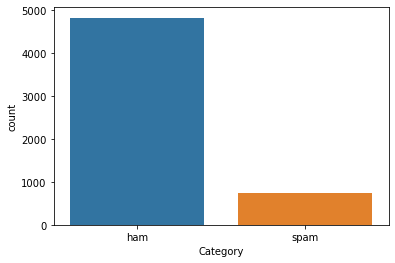

In [7]:
sns.countplot(data=email,x="Category")
plt.show()

In [8]:
#balancing the dataset by downsampling
email_spam = email[email["Category"]=="spam"]

email_ham = email[email["Category"]=="ham"]

In [9]:
#downsampling
email_ham_balanced = email_ham.sample(email_spam.shape[0])
email_bal = pd.concat([email_spam,email_ham_balanced])
print(email_bal["Category"].value_counts())

email_bal["Message"] = email_bal["Message"].str.lower()
email_bal["Message"] = email_bal["Message"].astype(str)

email_bal.sample(5)

spam    747
ham     747
Name: Category, dtype: int64


,Category,Message
77,ham,i like you peoples very much:) but am very shy...
109,ham,i know! grumpy old people. my mom was like you...
204,ham,goodmorning sleeping ga.
3943,ham,she's borderline but yeah whatever.
259,spam,we tried to contact you re your reply to our o...



 balanced dataset:
 spam    747
ham     747
Name: Category, dtype: int64


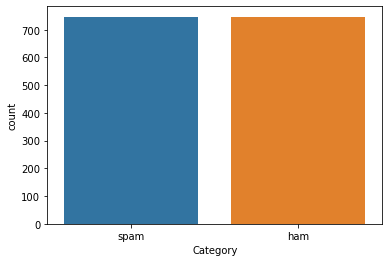

In [10]:
print("\n balanced dataset:\n",email_bal['Category'].value_counts())
sns.countplot(data=email_bal,x="Category")
plt.show()

In [11]:
#encoding spam=1 and ham=0
email_bal["Category"] = email_bal["Category"].apply(lambda x:1 if x == "spam" else 0)
email_bal.sample(10)

,Category,Message
1961,1,guess what! somebody you know secretly fancies...
791,0,this is hoping you enjoyed your game yesterday...
650,1,"you have won ?1,000 cash or a ?2,000 prize! to..."
5088,0,i wont do anything de.
924,0,she went to attend another two rounds today..b...
4154,1,urgent!! your 4* costa del sol holiday or â£50...
3182,0,so many people seems to be special at first si...
801,1,last chance! claim ur â£150 worth of discount ...
2002,0,idea will soon get converted to live:)
2354,1,please call 08712402902 immediately as there i...


In [12]:
 import re
import string
#remove punctuations
email_bal["Message"] = email_bal["Message"].str.replace('[^\w\s]','')
print('punctuation remove\n',email_bal["Message"])


punctuation remove
 2       free entry in 2 a wkly comp to win fa cup fina...
5       freemsg hey there darling its been 3 weeks now...
8       winner as a valued network customer you have b...
9       had your mobile 11 months or more u r entitled...
11      six chances to win cash from 100 to 20000 poun...
                              ...                        
4793                                  gd luck 4 ur exams 
2810    oh yeah i forgot u can only take 2 out shoppin...
4549     hope you are having a good week just checking in
5283                       yeah probably here for a while
3769                                where are you call me
Name: Message, Length: 1494, dtype: object


In [13]:
# processing the email message
 
# tokenize split words
email_bal["Message"] = email_bal.apply(lambda row: nltk.word_tokenize(row["Message"]), axis=1)
print( email_bal["Message"])



2       [free, entry, in, 2, a, wkly, comp, to, win, f...
5       [freemsg, hey, there, darling, its, been, 3, w...
8       [winner, as, a, valued, network, customer, you...
9       [had, your, mobile, 11, months, or, more, u, r...
11      [six, chances, to, win, cash, from, 100, to, 2...
                              ...                        
4793                             [gd, luck, 4, ur, exams]
2810    [oh, yeah, i, forgot, u, can, only, take, 2, o...
4549    [hope, you, are, having, a, good, week, just, ...
5283                [yeah, probably, here, for, a, while]
3769                          [where, are, you, call, me]
Name: Message, Length: 1494, dtype: object


In [14]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
# tokenize split words
#email_bal["Message"] = email_bal["Message"].str.split()
#stemming
email_bal["Message"] = email_bal["Message"].apply(lambda x: ([stemmer.stem(y) for y in x]))
print(email_bal["Message"])



2       [free, entri, in, 2, a, wkli, comp, to, win, f...
5       [freemsg, hey, there, darl, it, been, 3, week,...
8       [winner, as, a, valu, network, custom, you, ha...
9       [had, your, mobil, 11, month, or, more, u, r, ...
11      [six, chanc, to, win, cash, from, 100, to, 200...
                              ...                        
4793                              [gd, luck, 4, ur, exam]
2810    [oh, yeah, i, forgot, u, can, onli, take, 2, o...
4549    [hope, you, are, have, a, good, week, just, ch...
5283                 [yeah, probabl, here, for, a, while]
3769                          [where, are, you, call, me]
Name: Message, Length: 1494, dtype: object


In [15]:
#stopword
print("stopwords")
stop_word = set(stopwords.words('english') + ['u','ur','4','2','im','dont','doin','ure',"s"])
email_bal["Message"] = email_bal["Message"].apply(lambda x: " ".join(word for word in x if word not in stop_word))
print(email_bal["Message"]) 



stopwords
2       free entri wkli comp win fa cup final tkts 21s...
5       freemsg hey darl 3 week word back id like fun ...
8       winner valu network custom select receivea â90...
9       mobil 11 month r entitl updat latest colour mo...
11      six chanc win cash 100 20000 pound txt csh11 s...
                              ...                        
4793                                         gd luck exam
2810                    oh yeah forgot onli take shop onc
4549                                 hope good week check
5283                                         yeah probabl
3769                                                 call
Name: Message, Length: 1494, dtype: object


In [16]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X = email_bal["Message"]
y = email_bal["Category"]

x_train, x_test,y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state=24)

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

features = cv.fit_transform(x_train)
features_test = cv.transform(x_test)





              precision    recall  f1-score   support

           0       0.98      0.94      0.96       155
           1       0.93      0.98      0.96       144

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299



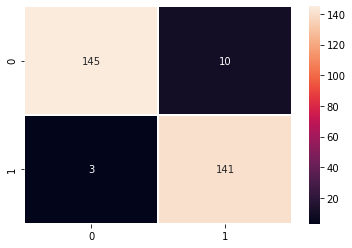

In [17]:
from sklearn import svm
#using SVC algorith
model = svm.SVC()
model.fit(features,y_train)
pred = model.predict(features_test)

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(pred,y_test))

confus = confusion_matrix(pred,y_test)
sns.heatmap(confus, annot=True,linewidths=1,fmt="d")
plt.show()


              precision    recall  f1-score   support

           0       0.96      0.97      0.97       146
           1       0.97      0.96      0.97       153

    accuracy                           0.97       299
   macro avg       0.97      0.97      0.97       299
weighted avg       0.97      0.97      0.97       299



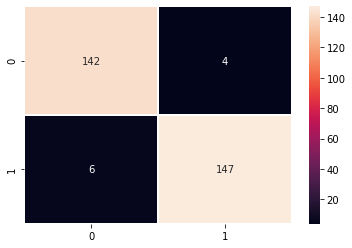

In [18]:
from sklearn.naive_bayes import MultinomialNB
bayes = MultinomialNB()
bayes.fit(features,y_train)
pred_bayes = bayes.predict(features_test)

print(classification_report(pred_bayes,y_test))


confus = confusion_matrix(pred_bayes,y_test)
sns.heatmap(confus, annot=True,linewidths=1,fmt="d")
plt.show()


In [19]:
bayes.predict(cv.transform(["mark work tomorrow get 5 work hous meet afterward"]))

array([0], dtype=int64)